In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
import plotly.express as px
import osmnx as ox

## Importación de BBDD

### Manzanas

In [2]:
manzanas = gpd.read_file('../data/lima_manzanas.gpkg')

In [3]:
print(manzanas.shape)
manzanas.head()

(124903, 31)


,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A,T_TOTAL,T_HOMBRES,T_MUJERES,...,CCPP,CCDI,NOMBDIST,CAPITAL,CODIGO,CNT_CCPP,DESCRIPCIO,layer,path,geometry
0,150102000102100023,150102,1,0001,02100,023,None,18.0,7.0,11.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723..."
1,150102000101101010,150102,1,0001,01101,010,None,31.0,14.0,17.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151..."
2,150102000100600037,150102,1,0001,00600,037,None,71.0,32.0,39.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981..."
3,150102000101202048,150102,1,0001,01202,048,None,12.0,5.0,7.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140..."
4,150102000101202010A,150102,1,0001,01202,010,A,2.0,0.0,2.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255..."


### Demanda

In [4]:
demanda = pd.read_csv("../data/BBDD Perú demanda/1_vm_limamet_pobma60_mz.csv")
print(demanda.shape)
demanda.head()

(55078, 7)


,id,ubigeo,nombdist,cod_mz,pobma60_mz,pobma60_dist,geom
0,9.0,150102,ANCON,150102000101101009B,5,1481,0106000020E6100000010000000103000000010000000D...
1,11.0,150102,ANCON,150102000101600020B,2,1481,0106000020E6100000010000000103000000010000000E...
2,12.0,150102,ANCON,150102000100500030,1,1481,0106000020E61000000100000001030000000100000005...
3,14.0,150102,ANCON,150102000100400044,2,1481,0106000020E61000000100000001030000000100000006...
4,15.0,150102,ANCON,150102000100200012,2,1481,0106000020E61000000100000001030000000100000009...


In [5]:
demanda.columns

Index(['id', 'ubigeo', 'nombdist', 'cod_mz', 'pobma60_mz', 'pobma60_dist',
       'geom'],
      dtype='object')

In [7]:
demanda_reduc = demanda[[ 'cod_mz', 'pobma60_mz', 'pobma60_dist']]
manzanas_merged = pd.merge(manzanas, demanda_reduc, left_on="Mz", right_on="cod_mz", how="left")

manzanas_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 125385 entries, 0 to 125384
Data columns (total 34 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Mz            125385 non-null  object  
 1   UBIGEO        125385 non-null  object  
 2   AREA          125385 non-null  object  
 3   CODCCPP       125385 non-null  object  
 4   ZONA          125385 non-null  object  
 5   MANZANA_ID    122633 non-null  object  
 6   MANZANA_A     46125 non-null   object  
 7   T_TOTAL       125385 non-null  float64 
 8   T_HOMBRES     125385 non-null  float64 
 9   T_MUJERES     125385 non-null  float64 
 10  LLAVE_MZS     125385 non-null  object  
 11  contacto      125385 non-null  object  
 12  descargar     125385 non-null  object  
 13  whatsapp      125385 non-null  float64 
 14  NOMBDEP       125385 non-null  object  
 15  NOMBPROV      125385 non-null  object  
 16  IDPROV        125385 non-null  object  
 17  ARCHIVO       125385 

### Oferta

In [9]:
oferta = pd.read_excel("../data/BBDD Perú oferta/padron_consolidado_adultos_mayores_modif.xlsx", usecols=["nombre", "nlatie", "nlongie", "lat", "lng"])


oferta["nlatie"].fillna(oferta["lat"], inplace=True)
oferta["nlongie"].fillna(oferta["lng"], inplace=True)

cols_drop = ["lat", "lng"]
oferta.drop(cols_drop, axis=1, inplace=True)
newnames = {'nlatie':'lat',
            'nlongie':'lng'}
oferta.rename(columns=newnames, inplace=True)
print(oferta.shape)
oferta.head()

(859, 3)


,nombre,lat,lng
0,0003 NUESTRA SEÑORA DEL CARMEN,-12.04592,-77.030495
1,8,-12.04592,-77.030495
2,003 SEÑORA DEL CARMEN,-12.04592,-77.030495
3,1008,-12.04592,-77.030495
4,0071 NUESTRA SEÑORA DE LA MERCED,-12.01674,-77.013370


In [10]:
oferta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  859 non-null    object 
 1   lat     859 non-null    float64
 2   lng     859 non-null    float64
dtypes: float64(2), object(1)
memory usage: 20.3+ KB


### Tiempos de viaje

El dataset contiene 2 variables:  
0 corresponde a la distancia  
1 corresponde a la duración del recorrido  

In [11]:
tiempos = pd.read_csv("../data/BBDD Perú accesibilidad/distance_duration_adulto_mayor.csv")
print(tiempos.shape)
tiempos.head()

(124903, 2)


,0,1
0,2785.4,2005.3
1,7793.4,5611.3
2,440.1,316.8
3,7230.4,5206.0
4,8604.4,6195.5


#### Matcheo de bases a manzanas

In [12]:
manzanas_merged['distancia_a_centro_am60'] =  tiempos["0"] / 1000 # metros a km
manzanas_merged['duracion_a_centro_am60'] = tiempos["1"] / 60 # segundos a minutos

### Pobreza

In [13]:
pobreza = pd.read_csv("../data/BBDD pobreza/peru_estratos_ingresos.csv")
print(pobreza.shape)
pobreza.head()

(98911, 10)


,FID,idmanzana,Ubigeo,Departamento,Provincia,Distrito,Hogares,Población,Estrato,geom
0,peru_estratos_ingresos.14645,150106092000020,150106,LIMA,LIMA,CARABAYLLO,4,10,2,MULTIPOLYGON (((-77.02289224399993 -11.8951647...
1,peru_estratos_ingresos.14646,150106092000010,150106,LIMA,LIMA,CARABAYLLO,31,129,2,MULTIPOLYGON (((-77.02352222499997 -11.8947903...
2,peru_estratos_ingresos.14647,150106035000100,150106,LIMA,LIMA,CARABAYLLO,14,50,1,MULTIPOLYGON (((-77.07526241299996 -11.8439180...
3,peru_estratos_ingresos.14648,150106092000450,150106,LIMA,LIMA,CARABAYLLO,32,149,2,MULTIPOLYGON (((-77.02031777899998 -11.8968804...
4,peru_estratos_ingresos.14649,150106092000080,150106,LIMA,LIMA,CARABAYLLO,55,263,2,MULTIPOLYGON (((-77.02249469799995 -11.8977410...


In [14]:
from shapely import wkt
import geopandas as gpd

# Convert the 'geom' column from WKT to shapely objects
pobreza['geom'] = pobreza['geom'].apply(wkt.loads)

# Now create the GeoDataFrame
gdf = gpd.GeoDataFrame(pobreza, geometry='geom')

manzanas_merged = pd.merge(manzanas_merged, gdf[["idmanzana", "Hogares", "Población", "Estrato", "geom"]], left_on='geometry', right_on="geom", how="left")
print(manzanas_merged.shape)
manzanas_merged.head()

(125385, 41)


,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A,T_TOTAL,T_HOMBRES,T_MUJERES,...,cod_mz,pobma60_mz,pobma60_dist,distancia_a_centro_am60,duracion_a_centro_am60,idmanzana,Hogares,Población,Estrato,geom
0,150102000102100023,150102,1,0001,02100,023,None,18.0,7.0,11.0,...,NaN,NaN,NaN,2.7854,33.421667,150102021000230,7.0,18.0,2.0,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723..."
1,150102000101101010,150102,1,0001,01101,010,None,31.0,14.0,17.0,...,NaN,NaN,NaN,7.7934,93.521667,150102011010100,9.0,31.0,1.0,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151..."
2,150102000100600037,150102,1,0001,00600,037,None,71.0,32.0,39.0,...,150102000100600037,3.0,1481.0,0.4401,5.280000,150102006000370,20.0,71.0,2.0,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981..."
3,150102000101202048,150102,1,0001,01202,048,None,12.0,5.0,7.0,...,NaN,NaN,NaN,7.2304,86.766667,150102012020480,4.0,12.0,1.0,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140..."
4,150102000101202010A,150102,1,0001,01202,010,A,2.0,0.0,2.0,...,NaN,NaN,NaN,8.6044,103.258333,15010201202010A,1.0,2.0,3.0,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255..."


In [15]:
manzanas_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 125385 entries, 0 to 125384
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Mz                       125385 non-null  object  
 1   UBIGEO                   125385 non-null  object  
 2   AREA                     125385 non-null  object  
 3   CODCCPP                  125385 non-null  object  
 4   ZONA                     125385 non-null  object  
 5   MANZANA_ID               122633 non-null  object  
 6   MANZANA_A                46125 non-null   object  
 7   T_TOTAL                  125385 non-null  float64 
 8   T_HOMBRES                125385 non-null  float64 
 9   T_MUJERES                125385 non-null  float64 
 10  LLAVE_MZS                125385 non-null  object  
 11  contacto                 125385 non-null  object  
 12  descargar                125385 non-null  object  
 13  whatsapp                 125385 non-

# Desiertos de cuidado

In [16]:
manzanas_merged.columns

Index(['Mz', 'UBIGEO', 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A',
       'T_TOTAL', 'T_HOMBRES', 'T_MUJERES', 'LLAVE_MZS', 'contacto',
       'descargar', 'whatsapp', 'NOMBDEP', 'NOMBPROV', 'IDPROV', 'ARCHIVO',
       'Nombre', 'Apellido', 'CCDD', 'CCPP', 'CCDI', 'NOMBDIST', 'CAPITAL',
       'CODIGO', 'CNT_CCPP', 'DESCRIPCIO', 'layer', 'path', 'geometry',
       'cod_mz', 'pobma60_mz', 'pobma60_dist', 'distancia_a_centro_am60',
       'duracion_a_centro_am60', 'idmanzana', 'Hogares', 'Población',
       'Estrato', 'geom'],
      dtype='object')

In [60]:
df = pd.DataFrame(manzanas_merged.drop(columns=['Mz', 'UBIGEO', 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A',  'LLAVE_MZS', 'contacto',
       'descargar', 'whatsapp', 'NOMBDEP', 'NOMBPROV', 'IDPROV', 'ARCHIVO',
       'Nombre', 'Apellido', 'CCDD', 'CCPP', 'CCDI', 'NOMBDIST', 'CAPITAL',
       'CODIGO', 'CNT_CCPP', 'DESCRIPCIO', 'layer', 'path', 'idmanzana',
       'geom', 'T_TOTAL', 'cod_mz', 'T_HOMBRES', 'T_MUJERES', 'pobma60_dist']))

# Dejo geometry para dropear despues de quitar nulls

df['pobma60_mz'] = df['pobma60_mz'].fillna(0)

# df = df.dropna()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125385 entries, 0 to 125384
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   geometry                 125385 non-null  geometry
 1   pobma60_mz               125385 non-null  float64 
 2   distancia_a_centro_am60  120302 non-null  float64 
 3   duracion_a_centro_am60   120302 non-null  float64 
 4   Hogares                  97985 non-null   float64 
 5   Población                97985 non-null   float64 
 6   Estrato                  97985 non-null   float64 
dtypes: float64(6), geometry(1)
memory usage: 6.7 MB


Defino como zonas 'problemáticas' aquellas donde el tiempo caminando es mayor a 20 minutos (considerando que esta caminata se da cargando hijos pequeños). Un 3% de los territorios termina caracterizado como zona a prestarle atención.

In [62]:
df['desierto'] = (df['duracion_a_centro_am60'] > 20).astype(int)
df.desierto.value_counts()

desierto
0    68651
1    56734
Name: count, dtype: int64

Para clasificar la población, normalizamos la data y estudiamos criterios empíricos.

In [63]:
print(df.pobma60_mz.median())
df.pobma60_mz.describe()


0.0


count    125385.000000
mean          2.168704
std           4.440954
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         260.000000
Name: pobma60_mz, dtype: float64

In [64]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['pobma60_mz']  

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[columns_to_scale])



In [65]:
df["pob_am60_mz_normal"]= df_scaled

In [66]:
df.pob_am60_mz_normal.describe()

count    1.253850e+05
mean    -5.893563e-17
std      1.000004e+00
min     -4.883439e-01
25%     -4.883439e-01
50%     -4.883439e-01
75%     -3.798847e-02
max      5.805787e+01
Name: pob_am60_mz_normal, dtype: float64

Estudio tres posibilidades:

In [67]:
umbral1 = df.pob_am60_mz_normal.mean()
umbral2 = df.pob_am60_mz_normal.mean() + df.pob_am60_mz_normal.std()
umbral3 = df.pob_am60_mz_normal.median()

In [68]:
df['alta_demanda'] = (df['pob_am60_mz_normal'] >= umbral1).astype(int)
#df['alta_demanda_2'] = (df['pob_0a5_mz_normal'] >= umbral2).astype(int)
#df['alta_demanda'] = (df['pob_am60_mz_normal'] >= umbral3).astype(int)

print(df.alta_demanda.value_counts())
#print(df.alta_demanda_2.value_counts())
#print(df.alta_demanda.value_counts())

alta_demanda
0    94058
1    31327
Name: count, dtype: int64


En este caso elijo la media, ya que la mediana es 0.

In [70]:
df["desierto_am60"] = df["desierto"] * df["alta_demanda"]
df.desierto_am60.value_counts()

desierto_am60
0    117094
1      8291
Name: count, dtype: int64

In [71]:
df.columns

Index(['geometry', 'pobma60_mz', 'distancia_a_centro_am60',
       'duracion_a_centro_am60', 'Hogares', 'Población', 'Estrato', 'desierto',
       'pob_am60_mz_normal', 'alta_demanda', 'desierto_am60'],
      dtype='object')

In [72]:
df_for_csv = df[["geometry", "pobma60_mz", "distancia_a_centro_am60", "duracion_a_centro_am60", "alta_demanda", "desierto_am60"]]
df_for_csv.head()

,geometry,pobma60_mz,distancia_a_centro_am60,duracion_a_centro_am60,alta_demanda,desierto_am60
0,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723...",0.0,2.7854,33.421667,0,0
1,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151...",0.0,7.7934,93.521667,0,0
2,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981...",3.0,0.4401,5.280000,1,0
3,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140...",0.0,7.2304,86.766667,0,0
4,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255...",0.0,8.6044,103.258333,0,0


In [78]:
#df_for_csv['geometry'] = df_for_csv['geometry'].apply(wkt.loads)

# Now create the GeoDataFrame
gdf = gpd.GeoDataFrame(df_for_csv, geometry='geometry')

manzanas_merged_2 = pd.merge(gdf, manzanas[["Mz", "UBIGEO", 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A', 'geometry']], on="geometry", how="left")
print(manzanas_merged_2.shape)
manzanas_merged_2.head()

(127505, 13)


,geometry,pobma60_mz,distancia_a_centro_am60,duracion_a_centro_am60,alta_demanda,desierto_am60,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A
0,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723...",0.0,2.7854,33.421667,0,0,150102000102100023,150102,1,0001,02100,023,None
1,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151...",0.0,7.7934,93.521667,0,0,150102000101101010,150102,1,0001,01101,010,None
2,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981...",3.0,0.4401,5.280000,1,0,150102000100600037,150102,1,0001,00600,037,None
3,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140...",0.0,7.2304,86.766667,0,0,150102000101202048,150102,1,0001,01202,048,None
4,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255...",0.0,8.6044,103.258333,0,0,150102000101202010A,150102,1,0001,01202,010,A


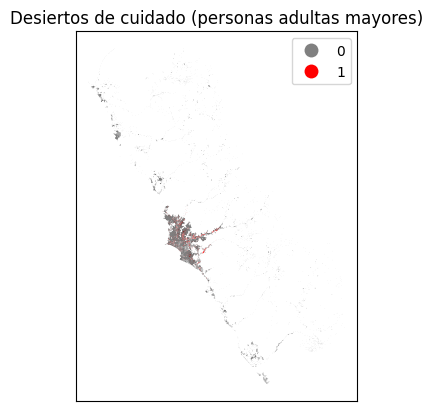

In [79]:
import matplotlib
#geopan = gpd.GeoDataFrame(df, geometry='geometry')

# Define a custom color map: red for 1, grey for 0
cmap = matplotlib.colors.ListedColormap(['grey', 'red'])

# Create a normalization object that maps your data values (0 and 1) to the colormap
norm = matplotlib.colors.BoundaryNorm([0, 0.5, 1], cmap.N)

fig, ax = plt.subplots(1, 1)

# Plot using the custom colormap and normalization
manzanas_merged_2.plot(column='desierto_am60', ax=ax, legend=True, categorical=True, cmap=cmap, norm=norm)

# Remove longitude and latitude ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Desiertos de cuidado (personas adultas mayores)')

# Save the figure with high resolution
plt.savefig('../figs/desiertos_de_cuidado_am60.png', format='png', dpi=1500)

plt.show()

In [80]:
manzanas_merged_2.columns

Index(['geometry', 'pobma60_mz', 'distancia_a_centro_am60',
       'duracion_a_centro_am60', 'alta_demanda', 'desierto_am60', 'Mz',
       'UBIGEO', 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A'],
      dtype='object')

In [81]:
manzanas_merged_2 = manzanas_merged_2[['Mz', 'UBIGEO', 'AREA', 'CODCCPP',
       'ZONA', 'MANZANA_ID', 'MANZANA_A', 'geometry', 'pobma60_mz', 'distancia_a_centro_am60',
       'duracion_a_centro_am60', 'alta_demanda', 'desierto_am60']]

In [82]:
manzanas_merged_2.desierto_am60.value_counts()

desierto_am60
0    119020
1      8485
Name: count, dtype: int64

In [83]:
manzanas_merged_2.to_csv("../results - desiertos/desiertos_am60.csv", index=False, sep=";", decimal=",")